# Stroke Prediction

# 

### Introduction & Importing Libraries

In [8]:
#Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
#Loading libraries

library(aod)
library(caret)
require(caTools)
library(class)
library(datasets)
library(dplyr)
library(e1071)
library(fastDummies)
library(ggplot2)
library(Hmisc)
library(InformationValue)
library(mediation)
library(naivebayes)
library(party)
library(psych)
library(pscl)
library(randomForest)
library(reshape2)
library(rpart.plot)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: caTools


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


The following object is masked from 'package:aod':

    rats


Loading required package: Formula


Attaching package: 'Hmisc'


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'InformationValue'


The following objects are masked from 'package:caret':

    confusionMatrix, precision, sensitivity, specificity


Loading required package: MASS


Attaching packag

### Data Preparation

In [81]:
#Loading the dataset
stroke <- read.csv('healthcare-dataset-stroke-data.csv')

In [82]:
print("Number of rows before cleaning: ", quote=FALSE)
nrow(stroke)

[1] Number of rows before cleaning: 


[1] 5110

In [83]:
#Removing unusable data
stroke <- subset(stroke, bmi != 'N/A')
stroke <- subset(stroke, smoking_status != 'Unknown')
stroke <- subset(stroke, gender!= 'Other')

In [84]:
#Creating dummy variables
stroke$ever_married[stroke$ever_married == 'Yes'] <- '1'
stroke$ever_married[stroke$ever_married == 'No'] <- '0' 
stroke <- dummy_cols(stroke, select_columns = 'work_type')
stroke <- dummy_cols(stroke, select_columns = 'Residence_type')
stroke <- dummy_cols(stroke, select_columns = 'smoking_status')
stroke <- dummy_cols(stroke, select_columns = 'gender')


In [85]:
print("Number of rows after cleaning: ", quote=FALSE)
nrow(stroke)

[1] Number of rows after cleaning: 


[1] 3425

In [86]:
#Turning columns numeric
stroke$bmi <- as.numeric(stroke$bmi)
stroke$ever_married <- as.double(stroke$ever_married)

In [89]:
#Removing non-numeric columns
stroke <- stroke[c(-1,-2,-7,-8,-11)]

### Descriptive Statistics Visualizations

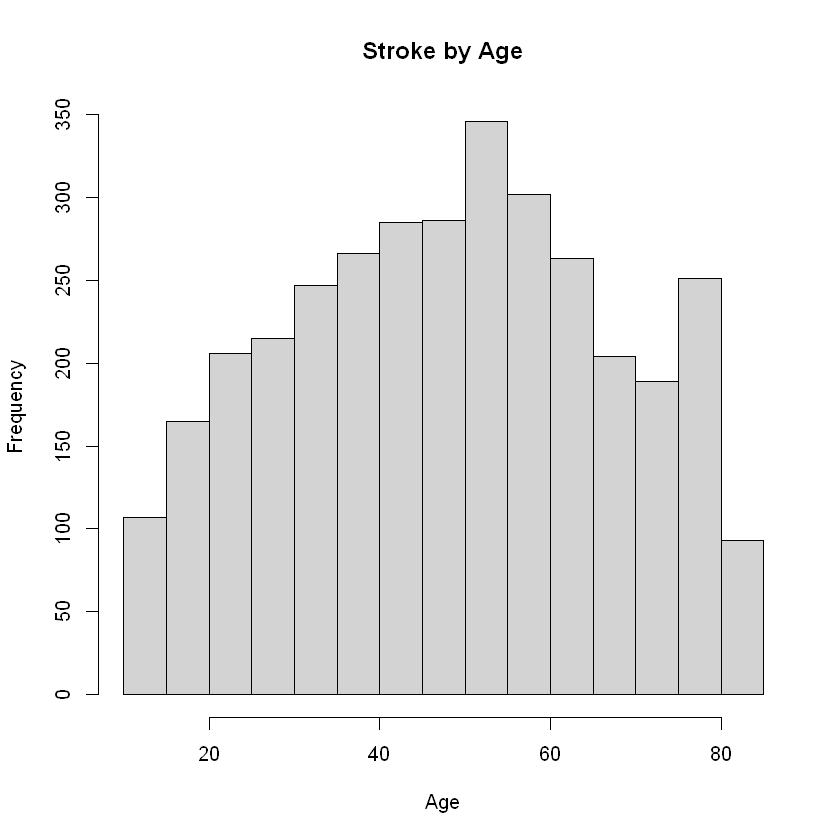

In [91]:
hist(stroke$age, main="Stroke by Age", xlab='Age')

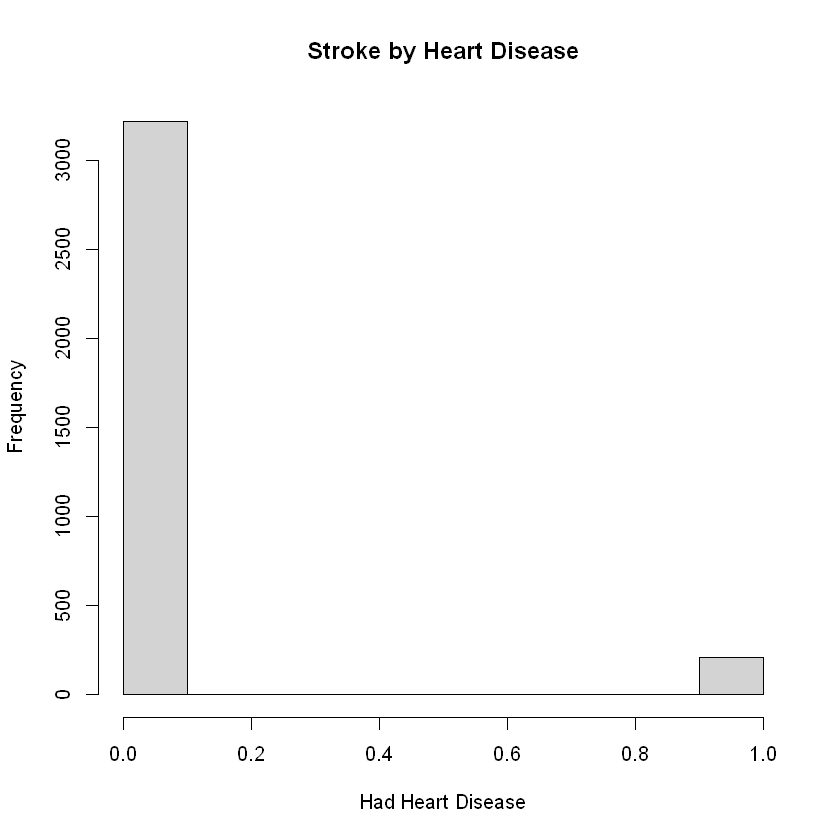

In [92]:
hist(stroke$heart_disease, main="Stroke by Heart Disease", xlab='Had Heart Disease')

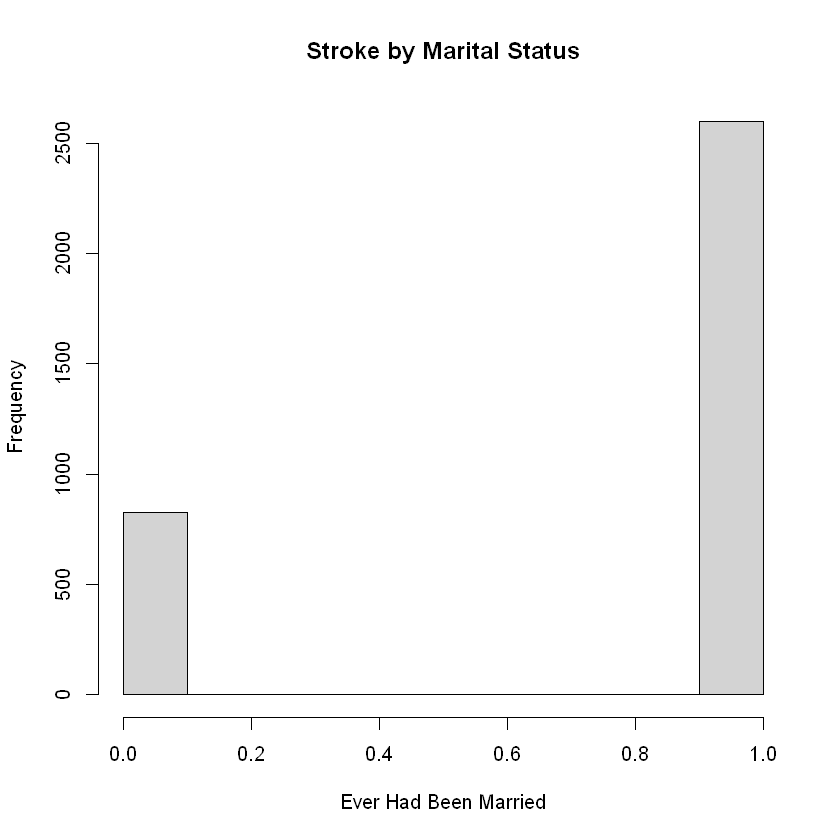

In [93]:
hist(stroke$ever_married, main="Stroke by Marital Status", xlab='Ever Had Been Married')

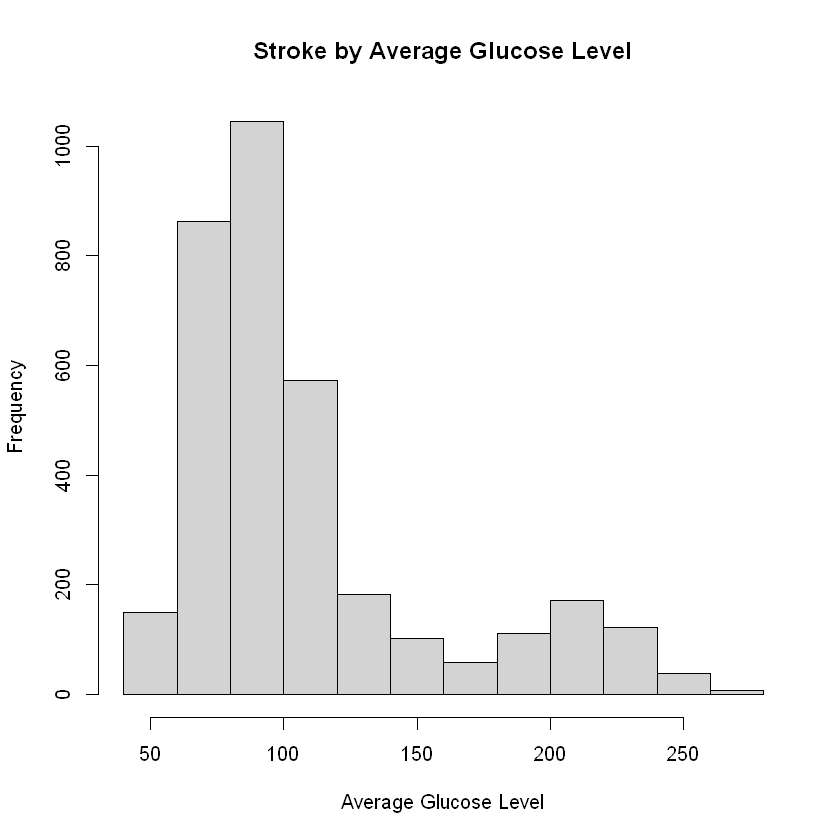

In [94]:
hist(stroke$avg_glucose_level, main="Stroke by Average Glucose Level", xlab='Average Glucose Level')

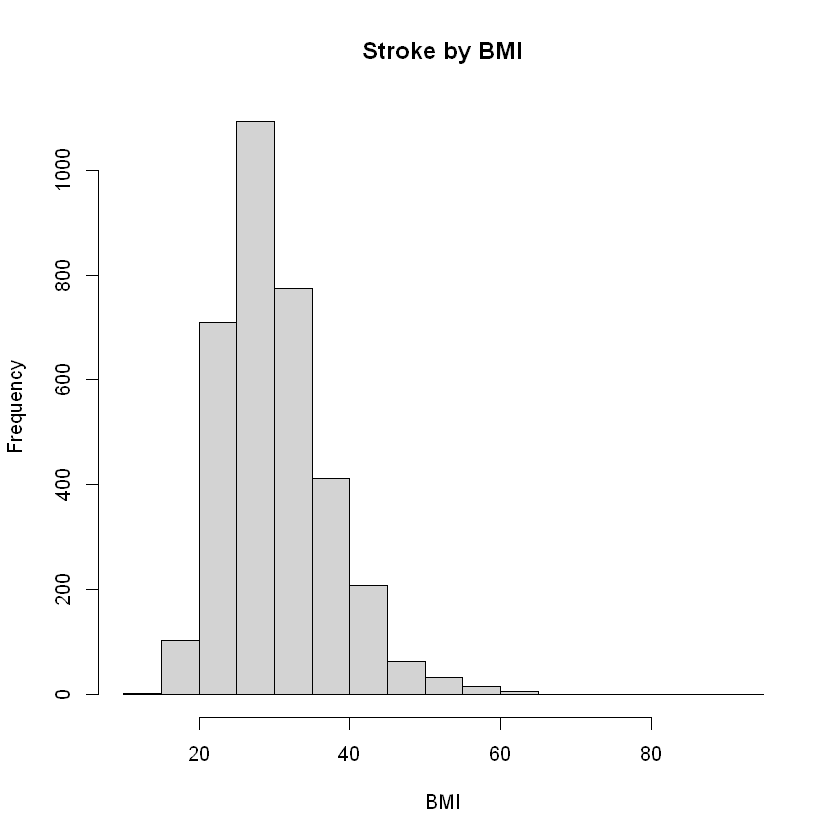

In [95]:
hist(stroke$bmi, main="Stroke by BMI", xlab='BMI')

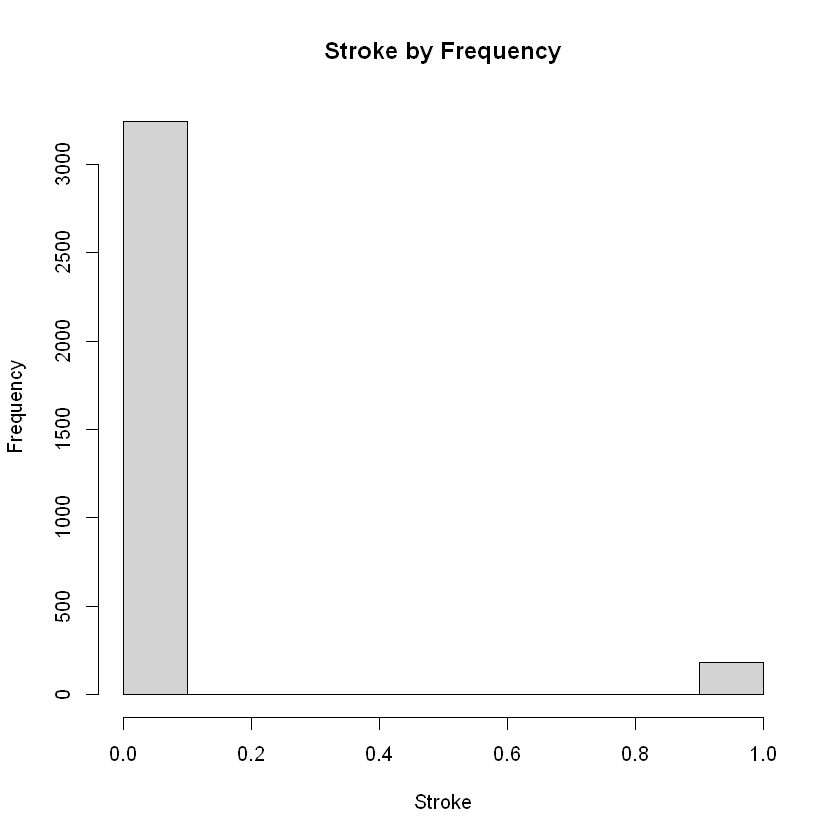

In [96]:
hist(stroke$stroke, main="Stroke by Frequency", xlab='Stroke')

## Correlation

In [97]:
cormat <- round(cor(stroke),3)
melted_cormat <- melt(cormat)
stroke_cormat <- melted_cormat[melted_cormat$Var1 == 'stroke', ]
stroke_cormat <- stroke_cormat[stroke_cormat$Var2 != 'stroke', ]
stroke_cormat

,Var1,Var2,value
,<fct>,<fct>,<dbl>
7,stroke,age,0.242
26,stroke,hypertension,0.144
45,stroke,heart_disease,0.139
64,stroke,ever_married,0.072
83,stroke,avg_glucose_level,0.141
102,stroke,bmi,0.012
140,stroke,work_type_children,-0.034
159,stroke,work_type_Govt_job,-0.015
178,stroke,work_type_Never_worked,-0.015


In [98]:
options(scipen=999)
cor.test(stroke$stroke, stroke$age, method='pearson') #<.001
cor.test(stroke$stroke, stroke$hypertension, method='pearson') #<.001
cor.test(stroke$stroke, stroke$heart_disease, method='pearson') #<.001
cor.test(stroke$stroke, stroke$ever_married, method='pearson') #<.001
cor.test(stroke$stroke, stroke$avg_glucose_level, method='pearson') #<.001
cor.test(stroke$stroke, stroke$bmi, method='pearson') #~.497
cor.test(stroke$stroke, stroke$work_type_children, method='pearson') #.04981
cor.test(stroke$stroke, stroke$work_type_Govt_job, method='pearson') #.0390
cor.test(stroke$stroke, stroke$work_type_Never_worked, method='pearson') #.377
cor.test(stroke$stroke, stroke$work_type_Private, method='pearson') #.290
cor.test(stroke$stroke, stroke$`work_type_Self-employed`, method='pearson')#self employed #.003
cor.test(stroke$stroke, stroke$Residence_type_Rural, method='pearson') #.726
cor.test(stroke$stroke, stroke$Residence_type_Urban, method='pearson') #.726
cor.test(stroke$stroke, stroke$`smoking_status_formerly smoked`, method='pearson')#formerly smoked #.020
cor.test(stroke$stroke, stroke$`smoking_status_never smoked`, method='pearson')#never smoked #.041
cor.test(stroke$stroke, stroke$smoking_status_smokes, method='pearson') #.960
cor.test(stroke$stroke, stroke$gender_Female, method='pearson') #.468
cor.test(stroke$stroke, stroke$gender_Male, method='pearson') #.468


	Pearson's product-moment correlation

data:  stroke$stroke and stroke$age
t = 14.622, df = 3423, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2106838 0.2737346
sample estimates:
      cor 
0.2424652 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$hypertension
t = 8.4911, df = 3423, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1106658 0.1762702
sample estimates:
      cor 
0.1436258 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$heart_disease
t = 8.1843, df = 3423, p-value = 0.0000000000000003821
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1055358 0.1712363
sample estimates:
      cor 
0.1385384 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$ever_married
t = 4.2, df = 3423, p-value = 0.00002737
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03820194 0.10484360
sample estimates:
       cor 
0.07160268 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$avg_glucose_level
t = 8.3034, df = 3423, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1075290 0.1731926
sample estimates:
      cor 
0.1405153 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$bmi
t = 0.67878, df = 3423, p-value = 0.4973
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0218998  0.0450759
sample estimates:
       cor 
0.01160106 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$work_type_children
t = -1.9623, df = 3423, p-value = 0.04981
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06693748497 -0.00002796523
sample estimates:
        cor 
-0.03352028 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$work_type_Govt_job
t = -0.8603, df = 3423, p-value = 0.3897
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04817138  0.01879886
sample estimates:
        cor 
-0.01470275 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$work_type_Never_worked
t = -0.88289, df = 3423, p-value = 0.3774
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04855652  0.01841295
sample estimates:
        cor 
-0.01508871 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$work_type_Private
t = -1.0575, df = 3423, p-value = 0.2903
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05153391  0.01542894
sample estimates:
        cor 
-0.01807275 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$`work_type_Self-employed`
t = 2.9582, df = 3423, p-value = 0.003116
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01703313 0.08384722
sample estimates:
       cor 
0.05049667 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$Residence_type_Rural
t = -0.35098, df = 3423, p-value = 0.7256
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03948335  0.02749895
sample estimates:
         cor 
-0.005998929 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$Residence_type_Urban
t = 0.35098, df = 3423, p-value = 0.7256
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02749895  0.03948335
sample estimates:
        cor 
0.005998929 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$`smoking_status_formerly smoked`
t = 2.3301, df = 3423, p-value = 0.01986
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.006311359 0.073190096
sample estimates:
      cor 
0.0397953 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$`smoking_status_never smoked`
t = -2.0492, df = 3423, p-value = 0.04052
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.068415320 -0.001512599
sample estimates:
        cor 
-0.03500318 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$smoking_status_smokes
t = 0.049766, df = 3423, p-value = 0.9603
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03264267  0.03434198
sample estimates:
         cor 
0.0008506073 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$gender_Female
t = -0.72629, df = 3423, p-value = 0.4677
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04588623  0.02108816
sample estimates:
        cor 
-0.01241296 



	Pearson's product-moment correlation

data:  stroke$stroke and stroke$gender_Male
t = 0.72629, df = 3423, p-value = 0.4677
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02108816  0.04588623
sample estimates:
       cor 
0.01241296 


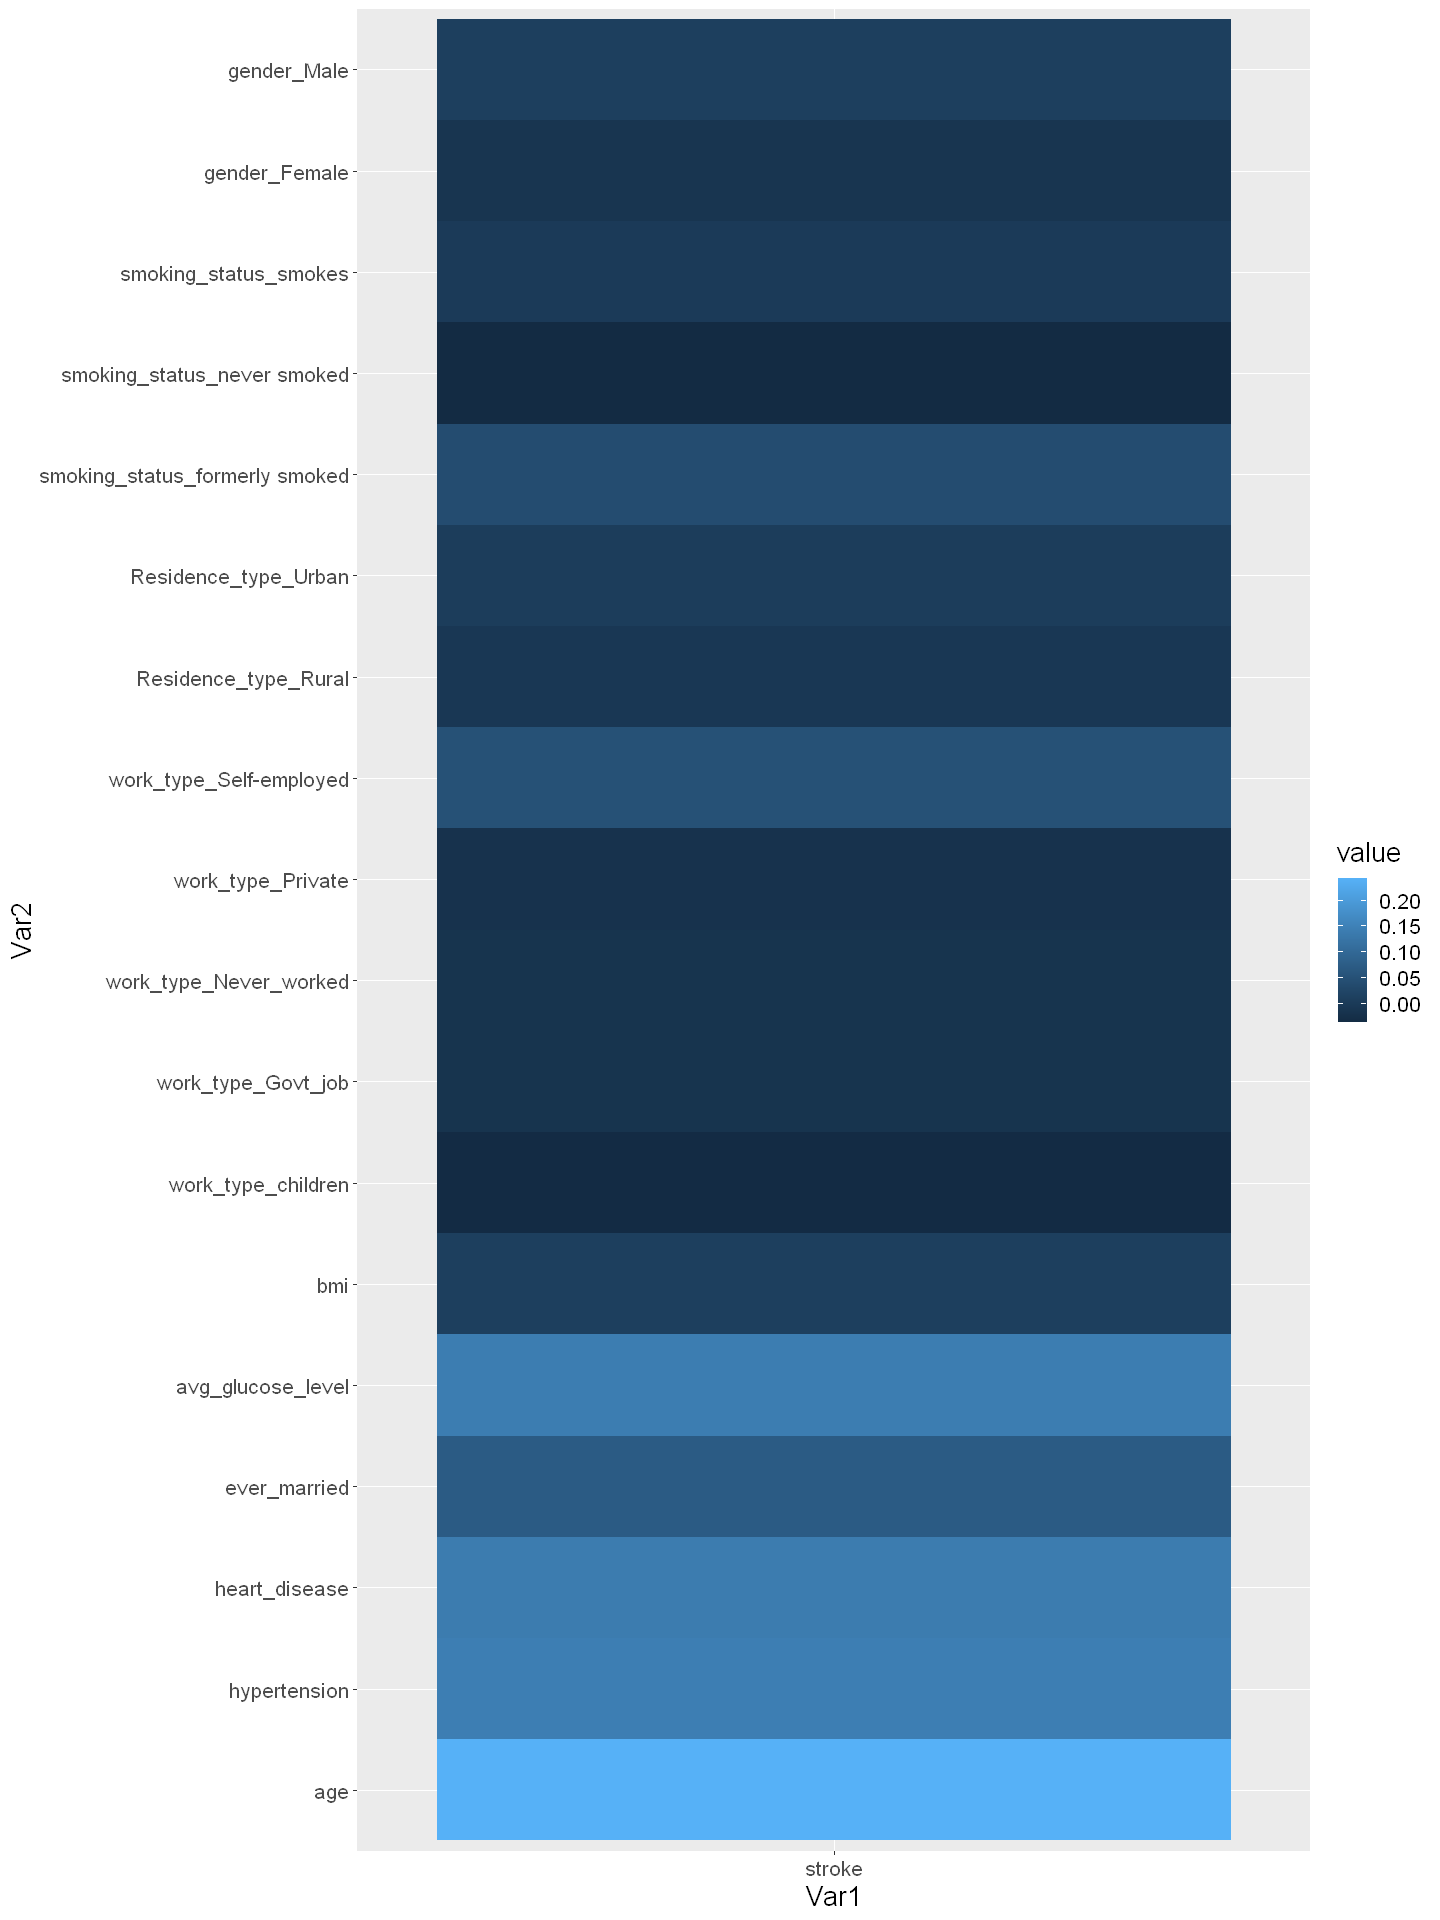

In [100]:
#Correlation heat map
options(repr.plot.width=12, repr.plot.height=16)
ggplot(data = stroke_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() + theme(text = element_text(size = 16))  

## Mediation Analysis

#### Age to Ever Married and Stroke

In [90]:
#Logistic regression between stroke and married.
stroke_married <- glm(data=stroke, stroke~ever_married, family='binomial')
summary(stroke_married)


Call:
glm(formula = stroke ~ ever_married, family = "binomial", data = stroke)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3565  -0.3565  -0.3565  -0.2214   2.7279  

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)   -3.6964     0.2264  -16.33 < 0.0000000000000002 ***
ever_married   0.9722     0.2406    4.04            0.0000534 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1410.9  on 3424  degrees of freedom
Residual deviance: 1390.4  on 3423  degrees of freedom
AIC: 1394.4

Number of Fisher Scoring iterations: 6


In [91]:
#Logistic regression between stroke and age.
stroke_age <- glm(data=stroke, stroke~age)
summary(stroke_age)


Call:
glm(formula = stroke ~ age, data = stroke)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.14828  -0.08800  -0.04781   0.00099   0.99525  

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.0871110  0.0102433  -8.504 <0.0000000000000002 ***
age          0.0028707  0.0001963  14.622 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.04689284)

    Null deviance: 170.54  on 3424  degrees of freedom
Residual deviance: 160.51  on 3423  degrees of freedom
AIC: -756.4

Number of Fisher Scoring iterations: 2


In [92]:
#Logistic regression between married and age.
married_age <- glm(data=stroke, ever_married~age)
summary(married_age)


Call:
glm(formula = ever_married ~ age, data = stroke)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.15471  -0.15471   0.09459   0.27266   0.60506  

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 0.1812602  0.0172525   10.51 <0.0000000000000002 ***
age         0.0118714  0.0003307   35.90 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.1330228)

    Null deviance: 626.80  on 3424  degrees of freedom
Residual deviance: 455.34  on 3423  degrees of freedom
AIC: 2814.7

Number of Fisher Scoring iterations: 2


#### Hypertension to Self Employed and Stroke

In [121]:
#Logistic regression between stroke and hypertension
stroke_hypertension <- glm(data=stroke, stroke~hypertension, family='binomial')
summary(stroke_hypertension)


Call:
glm(formula = stroke ~ hypertension, family = "binomial", data = stroke)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5486  -0.2885  -0.2885  -0.2885   2.5298  

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  -3.15821    0.09206 -34.305 < 0.0000000000000002 ***
hypertension  1.34048    0.16991   7.889  0.00000000000000304 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1410.9  on 3424  degrees of freedom
Residual deviance: 1358.1  on 3423  degrees of freedom
AIC: 1362.1

Number of Fisher Scoring iterations: 6


In [159]:
#Logistic regression between stroke and self-employed
stroke_selfemployed <- glm(data=stroke, stroke~`work_type_Self-employed`, family='binomial')
summary(stroke_hypertension)


Call:
glm(formula = stroke ~ hypertension, family = "binomial", data = stroke)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5486  -0.2885  -0.2885  -0.2885   2.5298  

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  -3.15821    0.09206 -34.305 < 0.0000000000000002 ***
hypertension  1.34048    0.16991   7.889  0.00000000000000304 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1410.9  on 3424  degrees of freedom
Residual deviance: 1358.1  on 3423  degrees of freedom
AIC: 1362.1

Number of Fisher Scoring iterations: 6


In [161]:
#Logistic regression between hypertension and self employed.
hypertension_employed <- glm(data=stroke, hypertension~`work_type_Self-employed`, family='binomial')
summary(hypertension_employed)


Call:
glm(formula = hypertension ~ `work_type_Self-employed`, family = "binomial", 
    data = stroke)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6293  -0.4722  -0.4722  -0.4722   2.1208  

Coefficients:
                          Estimate Std. Error z value             Pr(>|z|)    
(Intercept)               -2.13747    0.06156 -34.723 < 0.0000000000000002 ***
`work_type_Self-employed`  0.61875    0.12073   5.125          0.000000298 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2501.5  on 3424  degrees of freedom
Residual deviance: 2477.0  on 3423  degrees of freedom
AIC: 2481

Number of Fisher Scoring iterations: 4


### Train / Test

In [23]:
set.seed(421) #Setting random seed.
dt = sort(sample(nrow(stroke), nrow(stroke)*.7)) #Setting random 70% sample
train<-stroke[dt,] #Establishing train.
test<-stroke[-dt,] #Establishing test.

### Logistic Regression

In [24]:
#Running logistic regression.
model <- glm(stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level + bmi + work_type_Govt_job +
             work_type_Never_worked + work_type_Private + `work_type_Self-employed` + Residence_type_Rural
             + `smoking_status_never smoked` + smoking_status_smokes + gender_Female, family="binomial", data=train)
options(scipen=999)
summary(model)


Call:
glm(formula = stroke ~ age + hypertension + heart_disease + ever_married + 
    avg_glucose_level + bmi + work_type_Govt_job + work_type_Never_worked + 
    work_type_Private + `work_type_Self-employed` + Residence_type_Rural + 
    `smoking_status_never smoked` + smoking_status_smokes + gender_Female, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1854  -0.3338  -0.1957  -0.1148   3.1297  

Coefficients:
                                 Estimate  Std. Error z value
(Intercept)                    -18.734332  535.928816  -0.035
age                              0.066829    0.007991   8.363
hypertension                     0.732367    0.219863   3.331
heart_disease                    0.308641    0.274490   1.124
ever_married                    -0.233472    0.297236  -0.785
avg_glucose_level                0.004975    0.001687   2.950
bmi                             -0.007276    0.015785  -0.461
work_type_Govt_job      

In [25]:
#Setting fitting model.
pscl::pR2(model)["McFadden"]

fitting null model for pseudo-r2


McFadden 
0.1844646

In [26]:
#Creating prediction model.
test$predicted <- predict(model, test, type="response")

In [27]:
#convert defaults from "Yes" and "No" to 1's and 0's
test$default <- ifelse(test$predicted>=.5, 1, 0)

In [28]:
#find optimal cutoff probability to use to maximize accuracy
optimal <- optimalCutoff(test$default, test$predicted)[1]
optimal

[1] 0.4491738

In [29]:
confusionMatrix(test$default, test$stroke)

,0,1
,<int>,<int>
0,973,0
1,54,1


In [30]:
#calculate specificity
logistic_accuracy <- specificity(test$default, test$stroke)

#calculate total misclassification error rate
misClassError(test$default, test$stroke, threshold=optimal)

[1] 0.0525

In [31]:
logistic_accuracy * 100

[1] 94.74197

### Decision Tree Classifier

In [32]:
#Running decision tree model.
output.tree <- ctree(stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level + bmi + work_type_Govt_job +
             work_type_Never_worked + work_type_Private + `work_type_Self-employed` + Residence_type_Rural
             + `smoking_status_never smoked` + smoking_status_smokes + gender_Female, data = train)

output.tree


	 Conditional inference tree with 4 terminal nodes

Response:  stroke 
Inputs:  age, hypertension, heart_disease, ever_married, avg_glucose_level, bmi, work_type_Govt_job, work_type_Never_worked, work_type_Private, work_type_Self-employed, Residence_type_Rural, smoking_status_never smoked, smoking_status_smokes, gender_Female 
Number of observations:  2397 

1) age <= 67; criterion = 1, statistic = 136.548
  2) age <= 47; criterion = 1, statistic = 34.764
    3)*  weights = 1136 
  2) age > 47
    4) avg_glucose_level <= 103.37; criterion = 0.992, statistic = 11.901
      5)*  weights = 491 
    4) avg_glucose_level > 103.37
      6)*  weights = 334 
1) age > 67
  7)*  weights = 436 

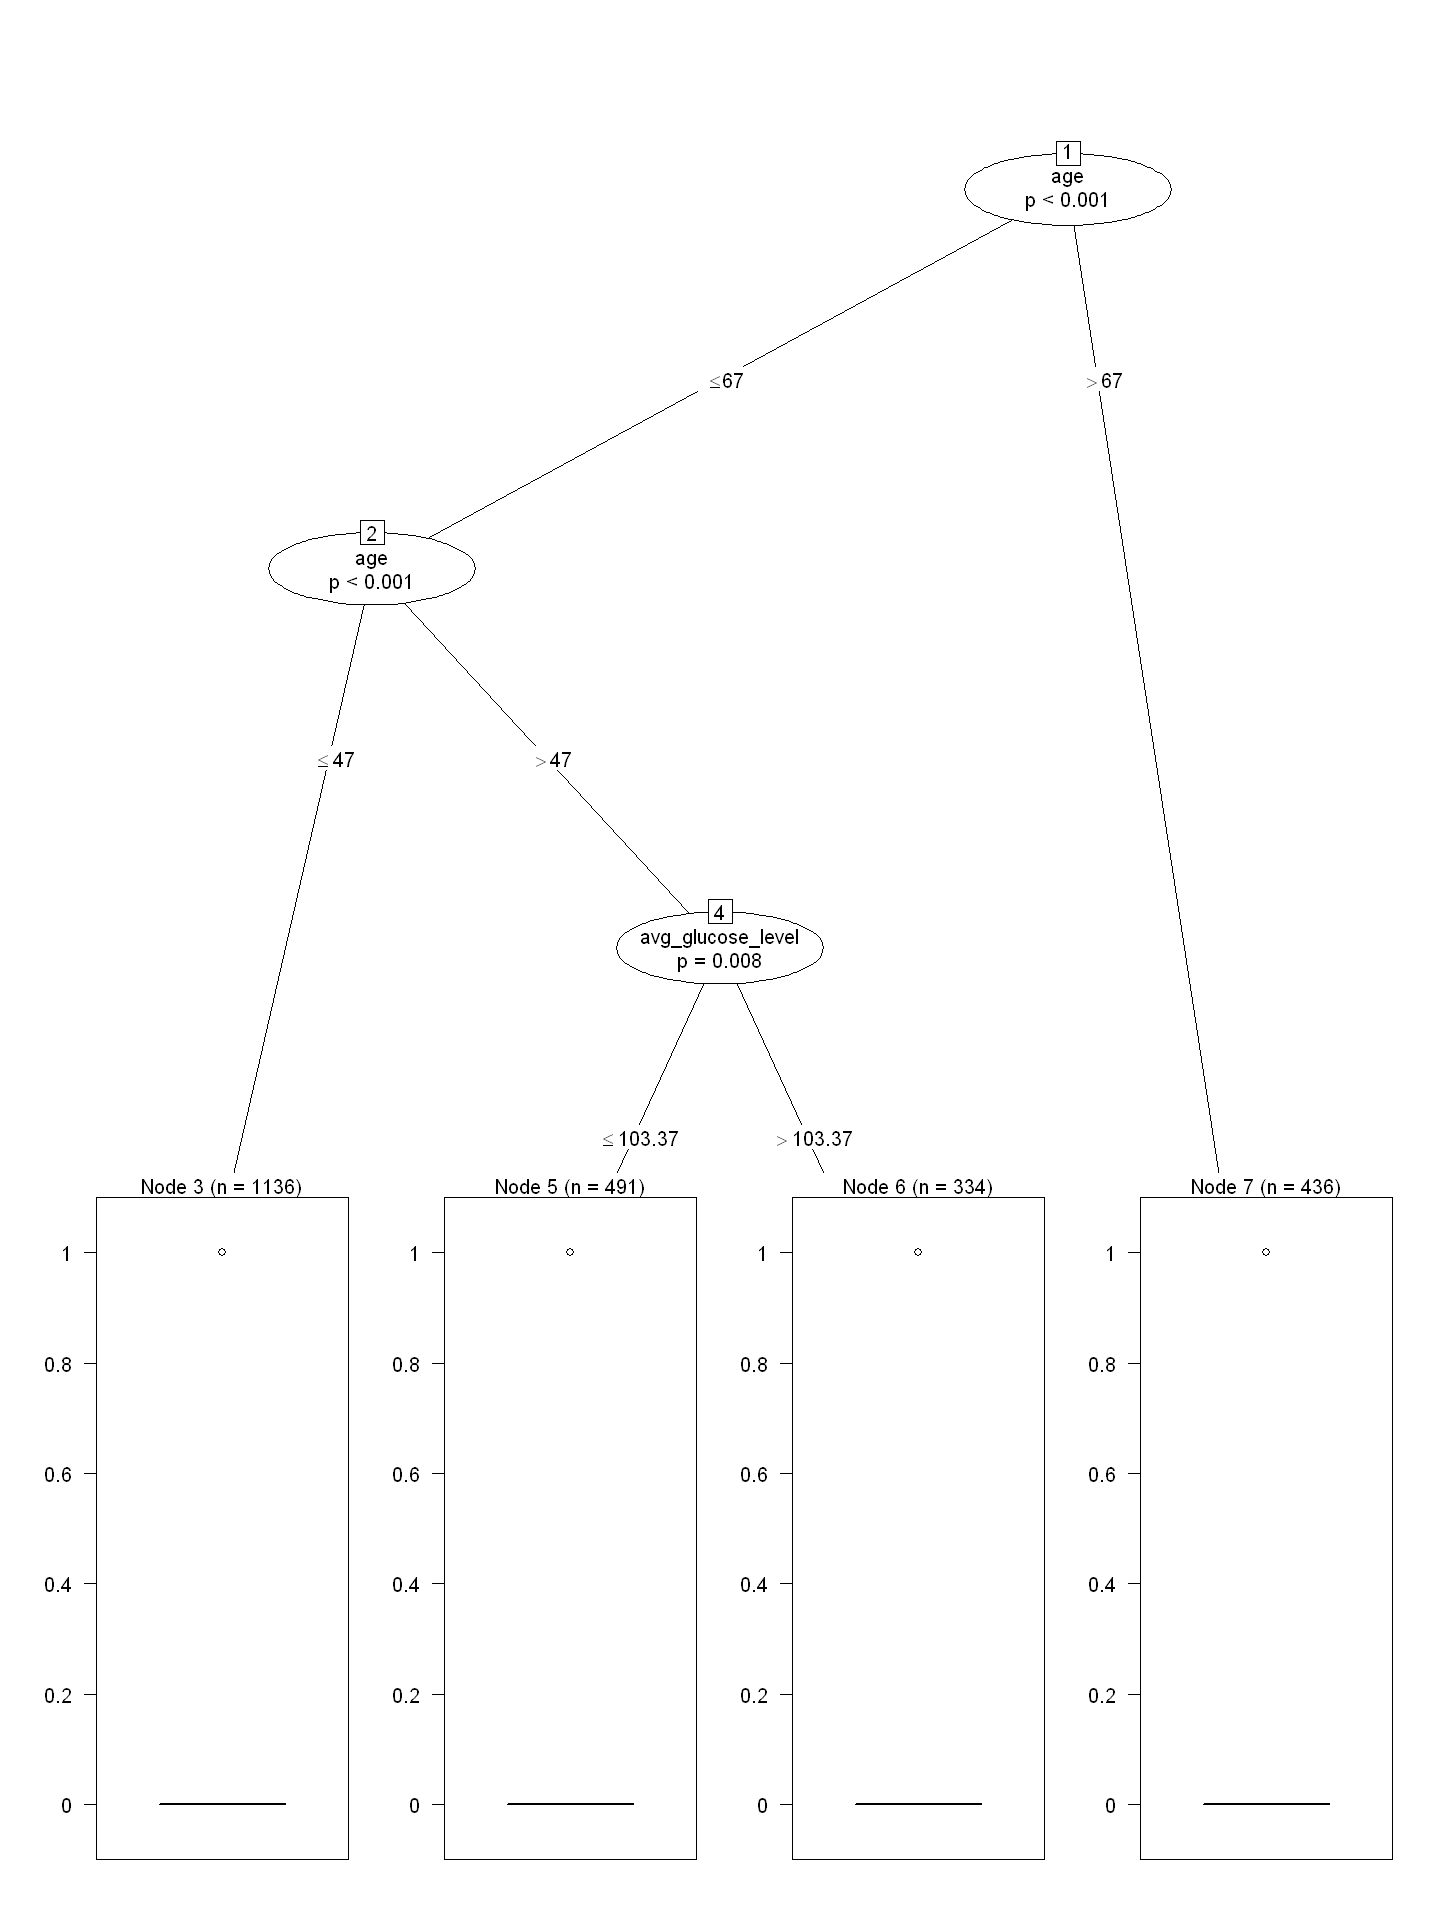

In [33]:
#Plotting.
plot(output.tree)

In [34]:
predict_model<-predict(output.tree, test)

In [35]:
m_at <- table(test$stroke, predict_model)
m_at

   predict_model
    0.00704225352112676 0.0264765784114053 0.0868263473053892 0.172018348623853
  0                 464                214                116               179
  1                   2                 11                  8                34

In [36]:
#Model accuracy.
DT_Acc <- sum(diag(m_at)) / sum(m_at)
DT_Acc * 100

[1] 46.20623

### Random Forest Classifier

In [37]:
#Converting test and train as factors.
train$stroke <- as.factor(train$stroke)
test$stroke <- as.factor(test$stroke)

In [38]:
#Running random forest classifier.
rf_default <- train(stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level + bmi + work_type_Govt_job +
             work_type_Never_worked + work_type_Private + `work_type_Self-employed` + Residence_type_Rural
             + `smoking_status_never smoked` + smoking_status_smokes + gender_Female,
    data = train,
    method = "rf",
    metric = "Accuracy")

In [39]:
rf_default

Random Forest 

2397 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2397, 2397, 2397, 2397, 2397, 2397, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   2    0.9483756  0.00000000
   8    0.9446536  0.01916729
  14    0.9417314  0.02716863

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [40]:
#Checking each random forest with each mtry.
tuneGrid <- expand.grid(.mtry = c(1: 20))
rf_mtry <- train(stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level + bmi + work_type_Govt_job +
             work_type_Never_worked + work_type_Private + `work_type_Self-employed` + Residence_type_Rural
             + `smoking_status_never smoked` + smoking_status_smokes + gender_Female,
    data = train,
    method = "rf",
    metric = "Accuracy",
    tuneGrid = tuneGrid,
    importance = TRUE,
    nodesize = 14,
    ntree = 300)
print(rf_mtry)

Random Forest 

2397 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2397, 2397, 2397, 2397, 2397, 2397, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa        
   1    0.9481065   0.0000000000
   2    0.9481065   0.0000000000
   3    0.9477866  -0.0006125152
   4    0.9471945  -0.0003226908
   5    0.9467385   0.0047221666
   6    0.9462416   0.0019957343
   7    0.9461912   0.0091215583
   8    0.9450477   0.0136131844
   9    0.9450997   0.0205330873
  10    0.9444575   0.0212928691
  11    0.9441384   0.0202898663
  12    0.9434233   0.0211458821
  13    0.9432772   0.0239215151
  14    0.9427406   0.0253049234
  15    0.9430544   0.0287989928
  16    0.9429703   0.0266638276
  17    0.9431020   0.0242216093
  18    0.9424699   0.0268992615
  19    0.9429604   0.0321096319
  20    0.9429241   0.0190241284

Accuracy was used to select the optimal model using the largest value.


In [42]:
RFAccuracy<-max(rf_mtry$results$Accuracy)
RFAccuracy

[1] 0.9481065

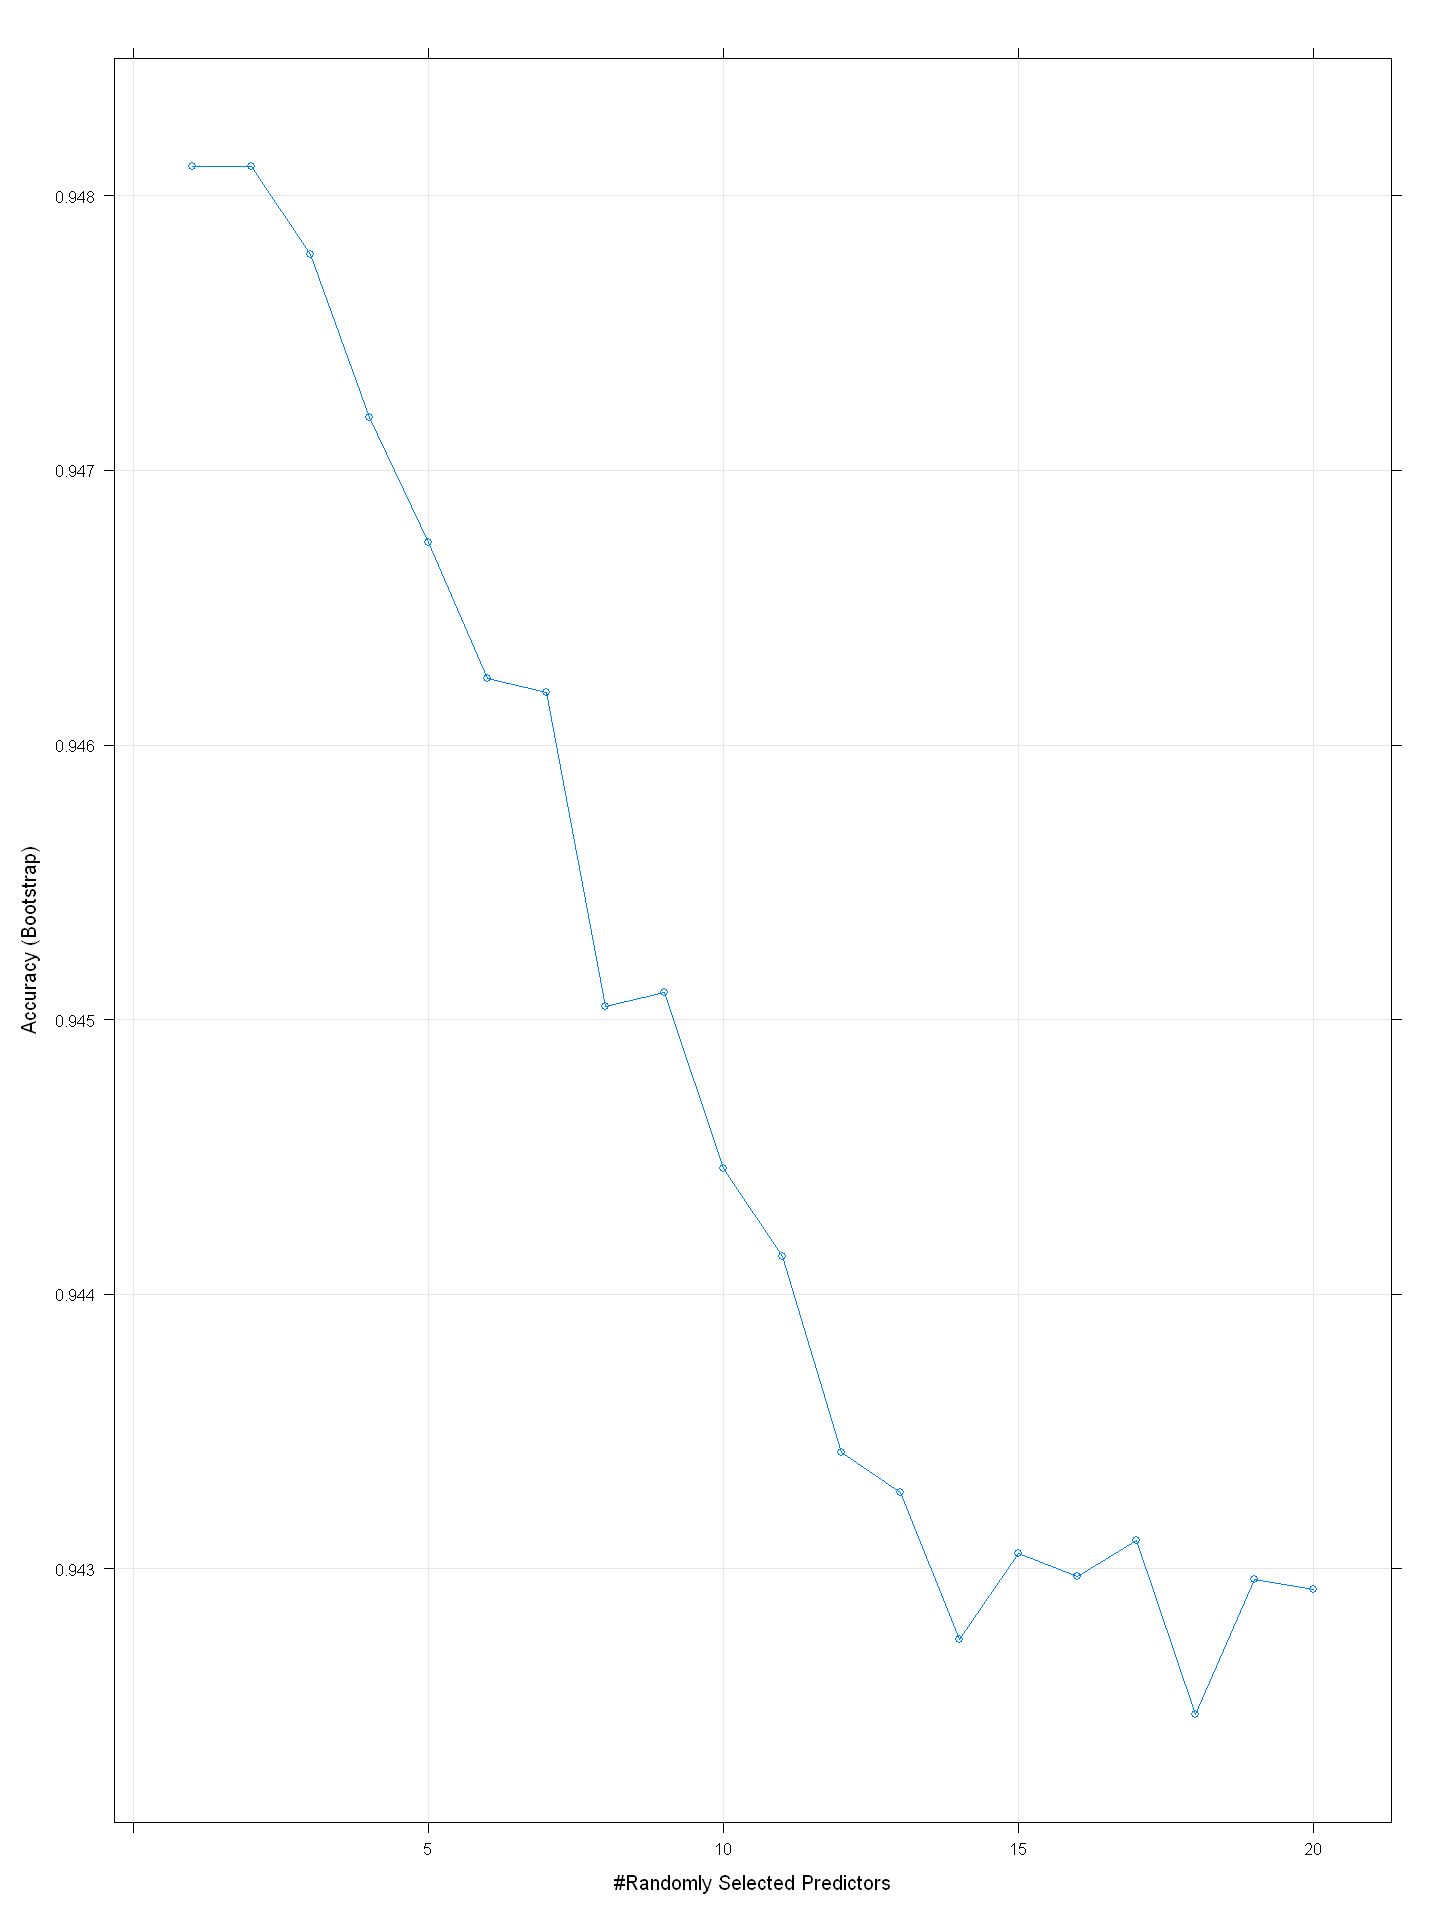

In [44]:
#Plotting accuracy for each mtry.
plot(rf_mtry)

### SVM

In [45]:
#Running SVM model.
svmfit = svm(stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level + bmi + work_type_Govt_job +
             work_type_Never_worked + work_type_Private + `work_type_Self-employed` + Residence_type_Rural
             + `smoking_status_never smoked` + smoking_status_smokes + gender_Female, data = stroke, kernel = "linear", cost = 10, scale = FALSE)

In [46]:
print(svmfit)


Call:
svm(formula = stroke ~ age + hypertension + heart_disease + ever_married + 
    avg_glucose_level + bmi + work_type_Govt_job + work_type_Never_worked + 
    work_type_Private + `work_type_Self-employed` + Residence_type_Rural + 
    `smoking_status_never smoked` + smoking_status_smokes + gender_Female, 
    data = stroke, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.07142857 
    epsilon:  0.1 


Number of Support Vectors:  2652



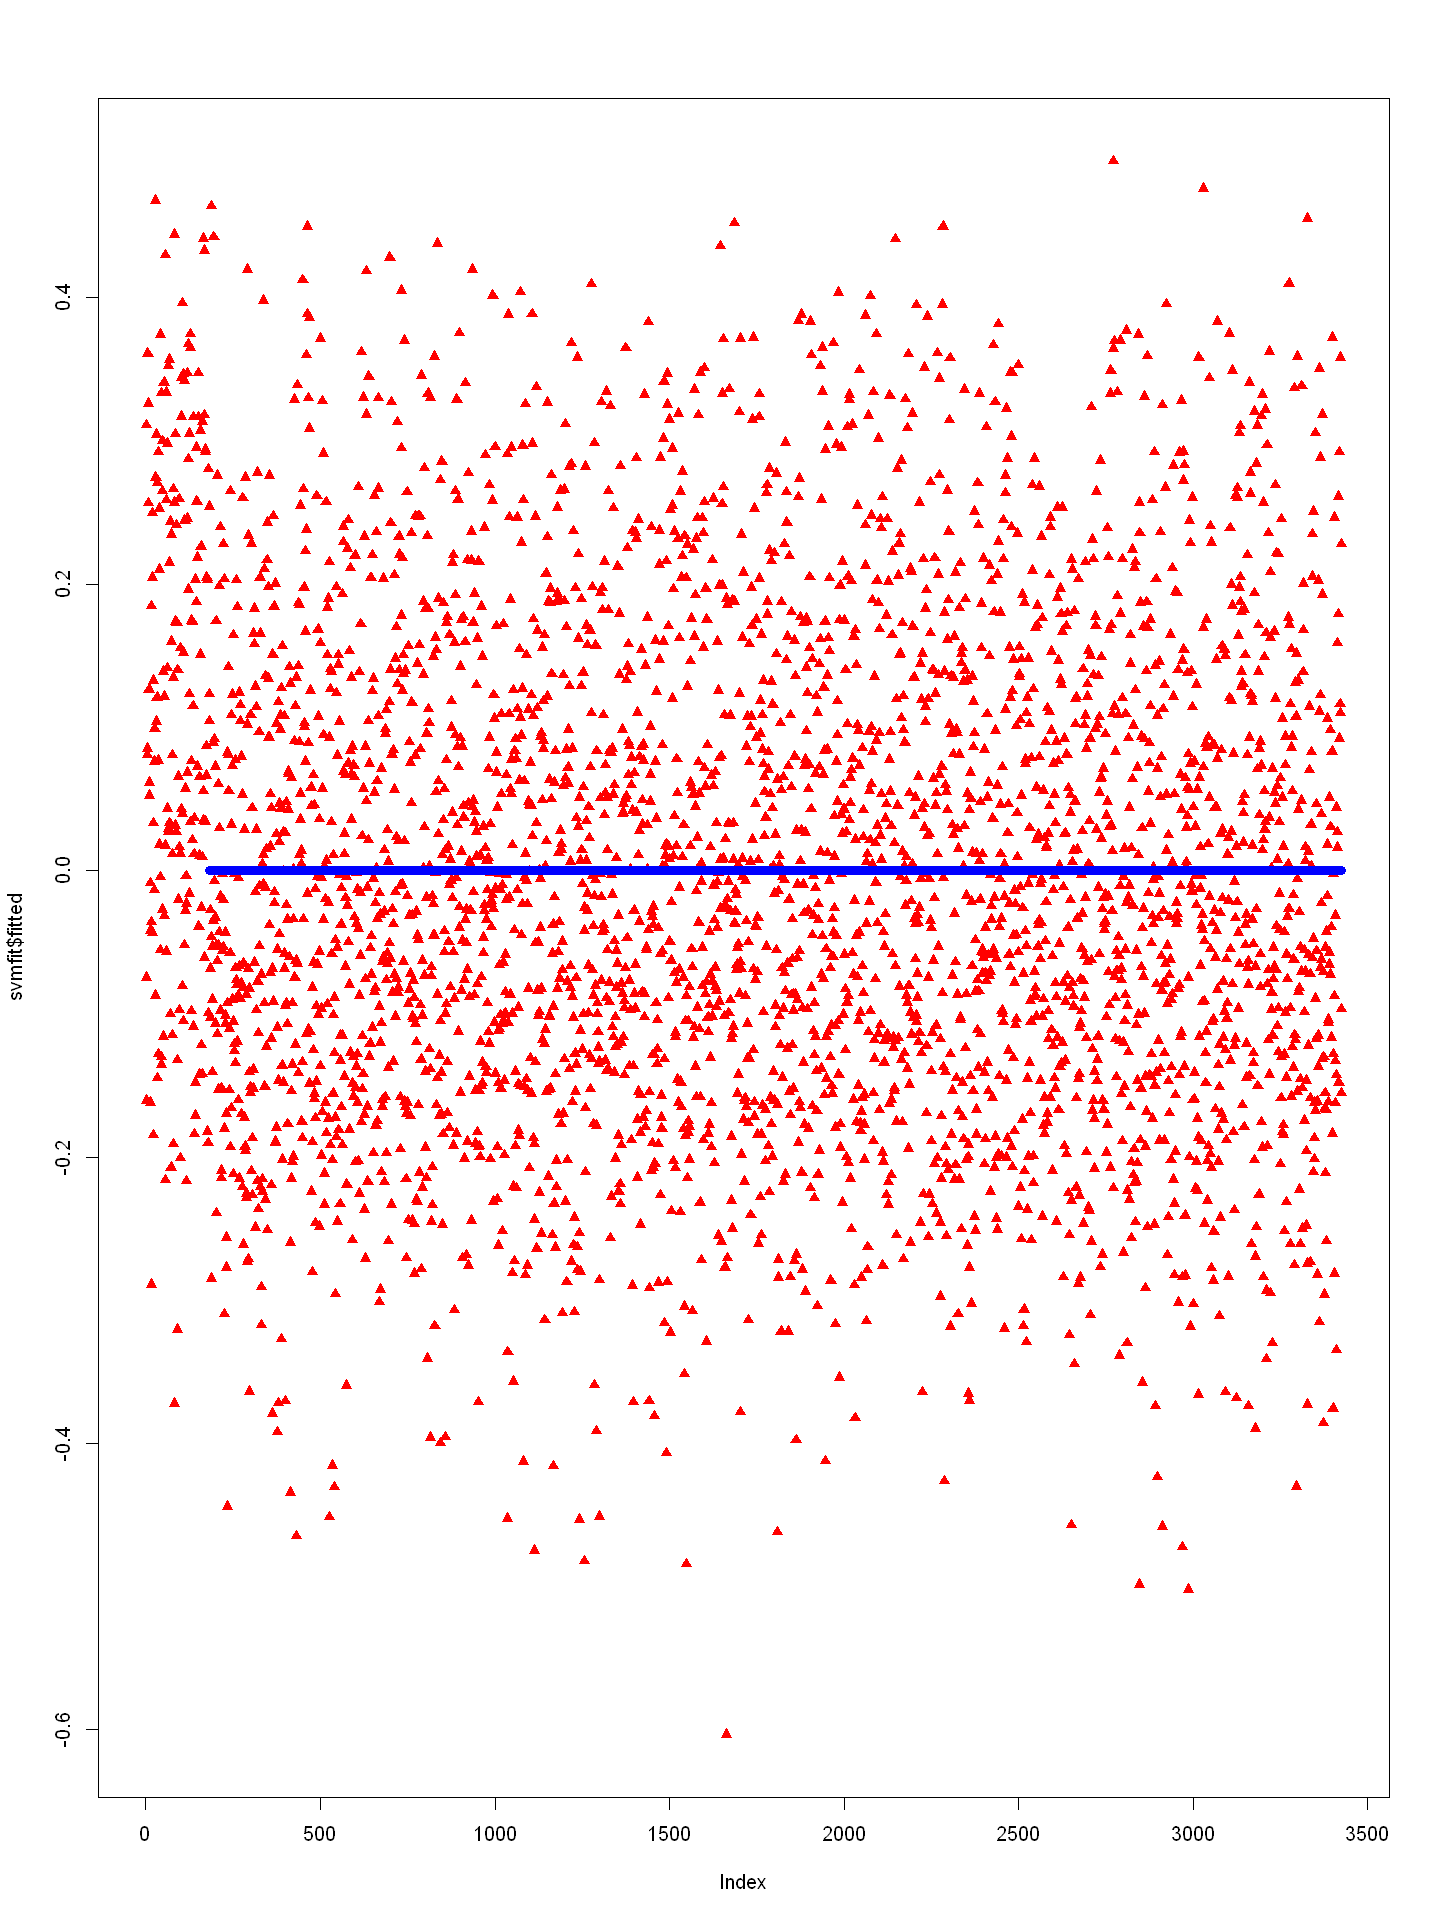

In [110]:
plot(svmfit$fitted, col = "red", pch = 17)
points(stroke$stroke, col = "blue", pch = 19)

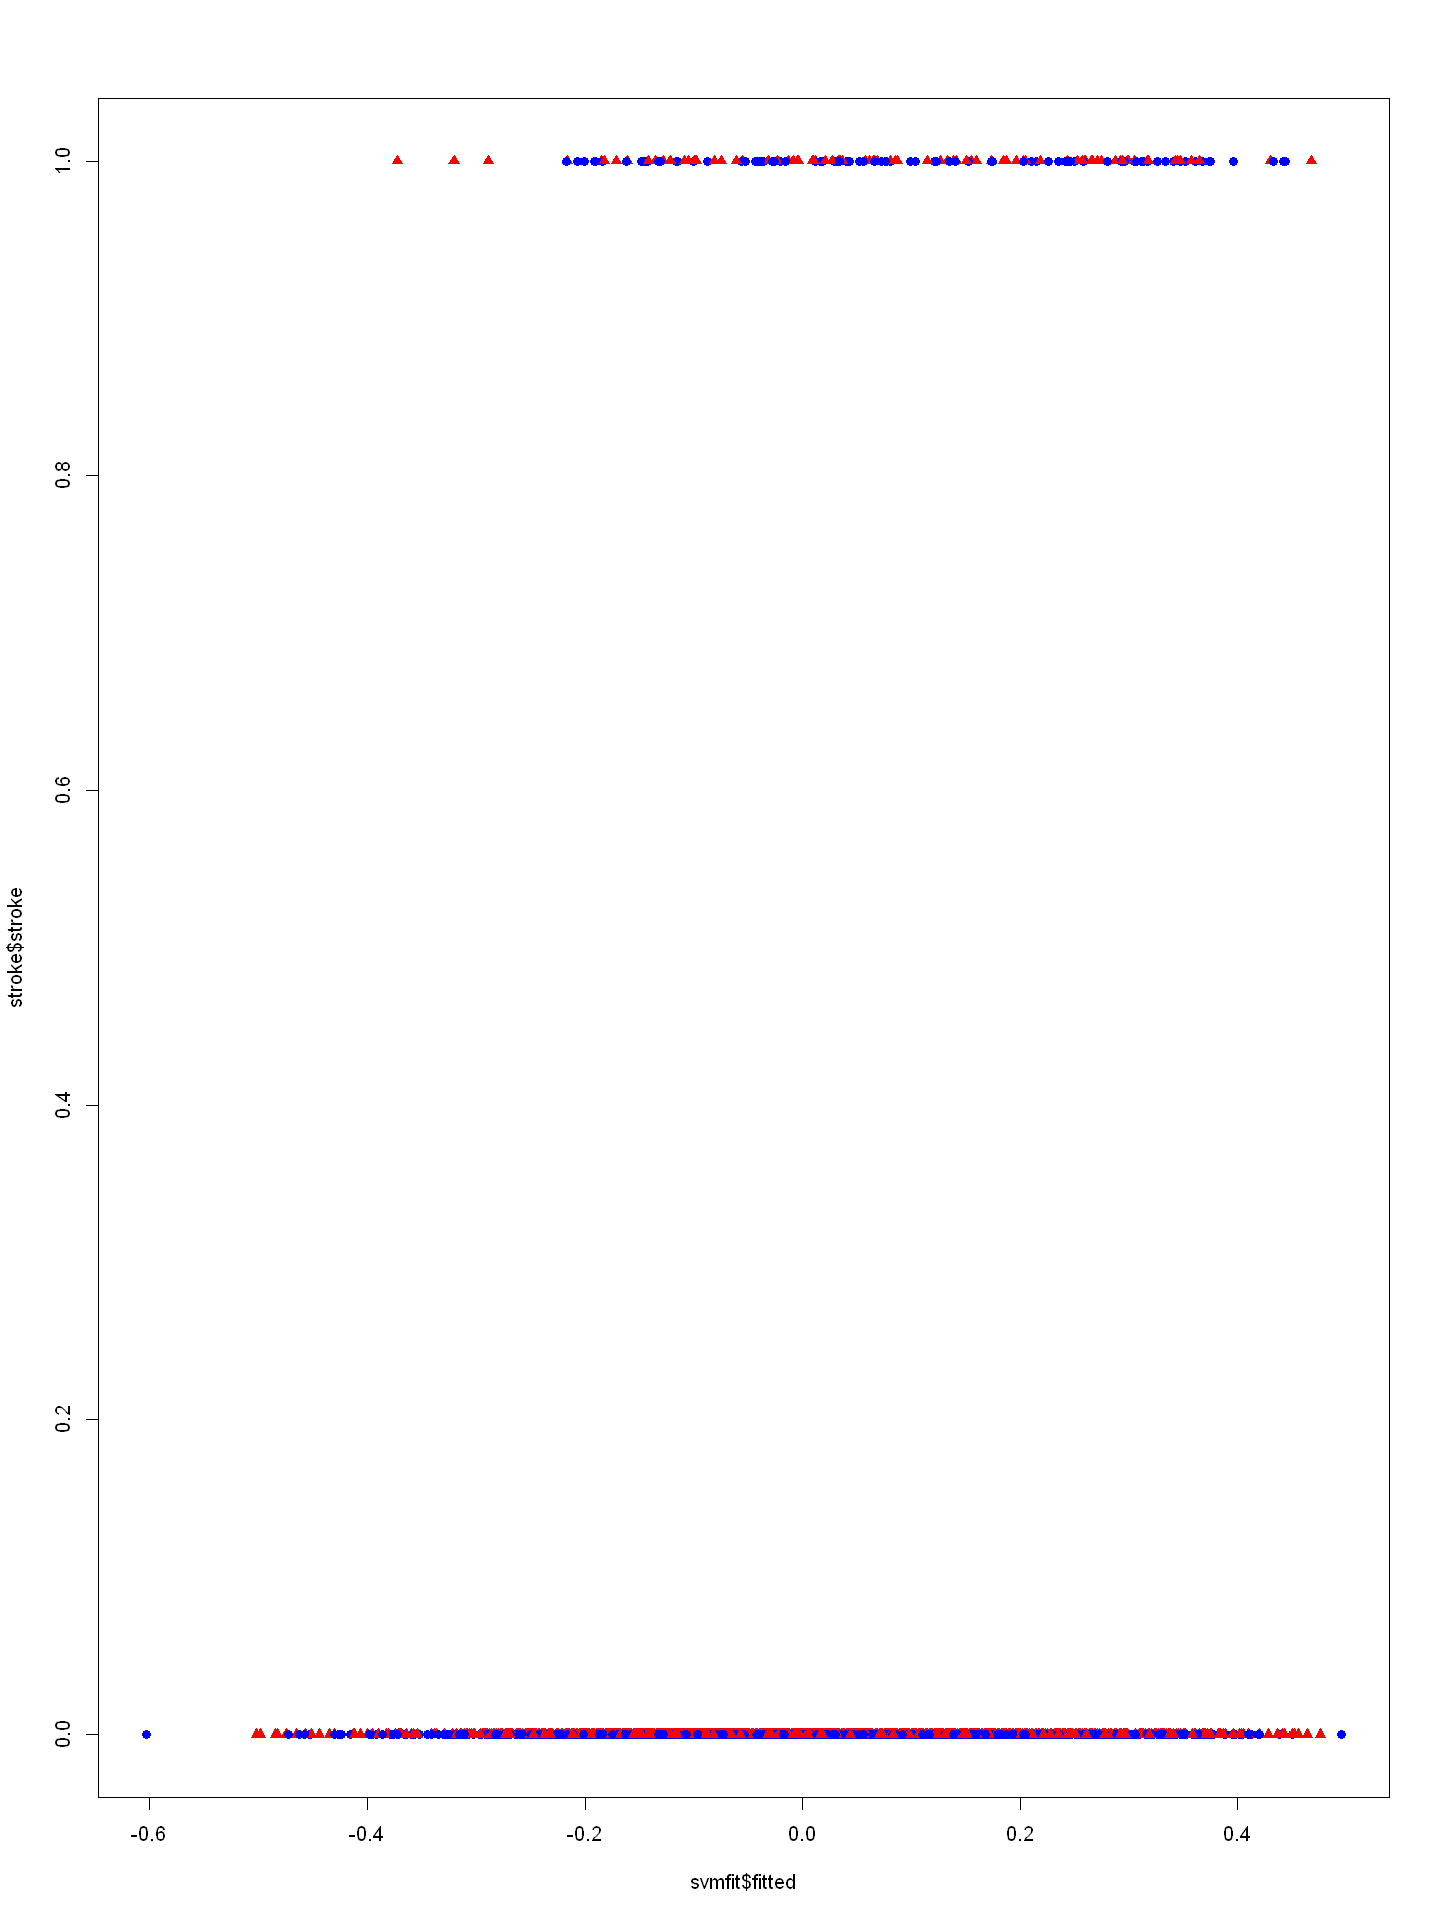

In [109]:
plot(svmfit$fitted,stroke$stroke, col = c("red", "blue"), pch = c(17, 19))

In [52]:
pred=predict(svmfit,test[,-7],type='class')

In [53]:
test$svm <- ifelse(pred >= .5, 1, 0)

In [54]:
table((test$svm), test$stroke, dnn=c("Prediction", "Actual"))   

          Actual
Prediction   0   1
         0 973  55

In [55]:
SVM_specificity <- 981/(981+47)
SVM_specificity

[1] 0.9542802

### K Nearest Neighbors

In [56]:
#Normalization
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

In [57]:
stroke2<- stroke[,c(7,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19)]

In [58]:
head(stroke2)

,stroke,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_children,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,67,0,1,1,228.69,36.6,0,0,0,1,0,0,1,1,0,0,0,1
2,1,80,0,1,1,105.92,32.5,0,0,0,1,0,1,0,0,1,0,0,1
3,1,49,0,0,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1,1,0
4,1,79,1,0,1,174.12,24.0,0,0,0,0,1,1,0,0,1,0,1,0
5,1,81,0,0,1,186.21,29.0,0,0,0,1,0,0,1,1,0,0,0,1
6,1,74,1,1,1,70.09,27.4,0,0,0,1,0,1,0,0,1,0,0,1


In [59]:
stroke_subset <- as.data.frame(lapply(stroke2[,2:19], normalize))

In [60]:
head(stroke_subset)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_children,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self.employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly.smoked,smoking_status_never.smoked,smoking_status_smokes,gender_Female,gender_Male
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7916667,0,1,1,0.80126489,0.3118012,0,0,0,1,0,0,1,1,0,0,0,1
2,0.9722222,0,1,1,0.23451205,0.2608696,0,0,0,1,0,1,0,0,1,0,0,1
3,0.5416667,0,0,1,0.53600776,0.2844720,0,0,0,1,0,0,1,0,0,1,1,0
4,0.9583333,1,0,1,0.54934909,0.1552795,0,0,0,0,1,1,0,0,1,0,1,0
5,0.9861111,0,0,1,0.60516111,0.2173913,0,0,0,1,0,0,1,1,0,0,0,1
6,0.8888889,1,1,1,0.06910719,0.1975155,0,0,0,1,0,1,0,0,1,0,0,1


In [61]:
set.seed(123)
data <- sample(1:nrow(stroke_subset),size=nrow(stroke_subset)*0.7,replace = FALSE) #random selection of 70% data.
stroke_train <- stroke_subset[data,] # 70% training data
stroke_test <- stroke_subset[-data,] # remaining 30% test data

In [62]:
#Creating seperate dataframe for 'Creditability' feature which is our target.
train_labels <- stroke_subset[data,1]
test_labels <- stroke_subset[-data,1]

In [63]:
sqrt_train_labels <- sqrt(NROW(train_labels))
sqrt_train_labels

[1] 48.95917

In [65]:
knn_sqrt_48 <- as.numeric(knn(train=stroke_train, test=stroke_test, cl=train_labels, k=48))
knn_sqrt_49 <- as.numeric(knn(train=stroke_train, test=stroke_test, cl=train_labels, k=49))

In [66]:
table(knn_sqrt_49, test_labels)

           test_labels
knn_sqrt_49 0 0.0138888888888889 0.0277777777777778 0.0416666666666667
         2  1                  0                  1                  1
         3  2                  2                  1                  3
         5  0                  0                  1                  0
         6  0                  0                  0                  0
         7  0                  0                  0                  0
         9  0                  0                  1                  0
         10 0                  0                  0                  0
         11 0                  0                  0                  0
         12 0                  0                  0                  1
         13 0                  0                  0                  0
         14 0                  0                  0                  0
         15 0                  0                  0                  0
         16 0                  0                  0   

In [67]:
#Manual confusion matrix math.
cm_49 = (0.0138888888888889+0.0416666666666667)/(0.0277777777777778+0.0416666666666667)
cm_49

[1] 0.8

### Naive Bayes

In [68]:
#Creating train, test for this model.
train_scale <- scale(train[, 1:4])
test_scale <- scale(test[, 1:4])

In [69]:
classifier_cl <- naiveBayes(stroke ~. , data = train)
classifier_cl


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.94785148 0.05214852 

Conditional probabilities:
   age
Y       [,1]     [,2]
  0 47.23063 18.55895
  1 67.44000 12.21210

   hypertension
Y        [,1]      [,2]
  0 0.1012324 0.3017026
  1 0.3200000 0.4683533

   heart_disease
Y         [,1]      [,2]
  0 0.05237676 0.2228347
  1 0.18400000 0.3890435

   ever_married
Y        [,1]      [,2]
  0 0.7491197 0.4336152
  1 0.8720000 0.3354342

   avg_glucose_level
Y       [,1]     [,2]
  0 106.8983 46.22935
  1 135.7537 62.65063

   bmi
Y       [,1]     [,2]
  0 30.25775 7.314115
  1 30.31440 5.887544

   work_type_children
Y         [,1]      [,2]
  0 0.02376761 0.1523579
  1 0.00000000 0.0000000

   work_type_Govt_job
Y        [,1]      [,2]
  0 0.1478873 0.3550664
  1 0.1360000 0.3441680

   work_type_Never_worked
Y          [,1]       [,2]
  0 0.004401408 0.06621152
  1 0.000000

In [70]:
classifier_cl <- naiveBayes(stroke ~. , data = train)
classifier_cl


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.94785148 0.05214852 

Conditional probabilities:
   age
Y       [,1]     [,2]
  0 47.23063 18.55895
  1 67.44000 12.21210

   hypertension
Y        [,1]      [,2]
  0 0.1012324 0.3017026
  1 0.3200000 0.4683533

   heart_disease
Y         [,1]      [,2]
  0 0.05237676 0.2228347
  1 0.18400000 0.3890435

   ever_married
Y        [,1]      [,2]
  0 0.7491197 0.4336152
  1 0.8720000 0.3354342

   avg_glucose_level
Y       [,1]     [,2]
  0 106.8983 46.22935
  1 135.7537 62.65063

   bmi
Y       [,1]     [,2]
  0 30.25775 7.314115
  1 30.31440 5.887544

   work_type_children
Y         [,1]      [,2]
  0 0.02376761 0.1523579
  1 0.00000000 0.0000000

   work_type_Govt_job
Y        [,1]      [,2]
  0 0.1478873 0.3550664
  1 0.1360000 0.3441680

   work_type_Never_worked
Y          [,1]       [,2]
  0 0.004401408 0.06621152
  1 0.000000

In [71]:
NB_Accuracy <- 0.94785

### Best Model

In [99]:
print("Logistic Regression")
logistic_accuracy*100

[1] "Logistic Regression"


[1] 94.74197

In [101]:
print("Decision Tree")
DT_Acc*100

[1] "Decision Tree"


[1] 46.20623

In [102]:
print("Random Forest")
RFAccuracy*100

[1] "Random Forest"


[1] 94.81065

In [103]:
print("SVM")
SVM_specificity*100

[1] "SVM"


[1] 95.42802

In [104]:
print("KNN Neighbors")
cm_49*100

[1] "KNN Neighbors"


[1] 80

In [105]:
print("Naive Baiyes")
NB_Accuracy*100

[1] "Naive Baiyes"


[1] 94.785

In [107]:
accuracy_list <- c(logistic_accuracy,DT_Acc, RFAccuracy, SVM_specificity, cm_49, NB_Accuracy)
max(accuracy_list*100)
#SVM

[1] 95.42802